# Heritability

This figure illustrate the evolution of heritability.


References:
- Galton (1885)
- Johanssen (1903)

In [1]:
import matplotlib.pyplot as plt
import estaudel.escaffolding as escaffolding
import glob
from sklearn import linear_model
import numpy as np
import estaudel.heredity.process as p

panel_dict = dict(xy=(1, 1), xycoords="axes fraction",
           ha='center', va='center',
            bbox=dict(boxstyle="round",
               ec=(.1, 0.1, .1),
               fc=(1., 1, 1),
           ))

# Data

To generate the data use the content of heritability.condor.

In [26]:
data = []
for x in glob.glob("out/heritability*.pkle"):
    if 'last' in x:
        pass
    else:
        try:
            data.append(escaffolding.load(x))
            p.extract(data[-1], complete=False)
        except Exception as ex:
            print('error', x, ex)
            
data = sorted(data, key= lambda x: x.parameters['goal'])
gmax = min([len(d.parents) for d in data])-3

print("Loaded {} files, highest common generation is {}".format(len(data), gmax))

Loaded 10 files, highest common generation is 9997


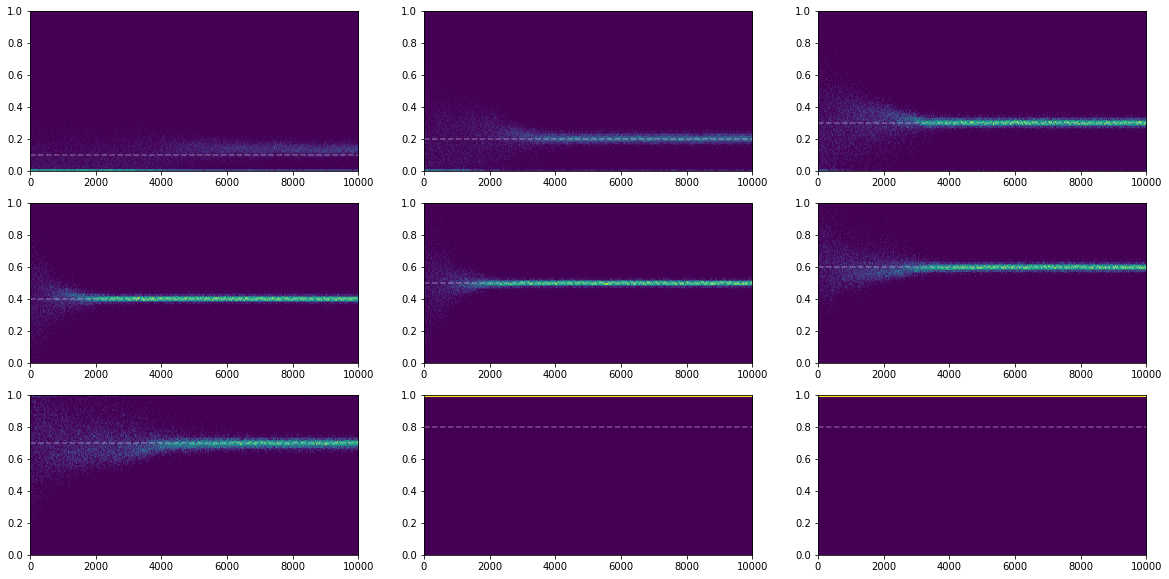

In [27]:
fig, axes = plt.subplots(3,3,figsize=(20,10))
for d,ax in zip(data,axes.flatten()):
    ax.imshow(d.data['cp_density'], aspect='auto', extent=(0,gmax,0,1))
    ax.hlines(d.parameters['goal'],0,gmax, color='white', linestyles='--', alpha=0.3)

In [29]:
d.data['individual_traits_density'].keys()

dict_keys([('red', 'interaction_inter'), ('blue', 'growth_rate'), ('blue', 'interaction_inter'), ('red', 'growth_rate')])

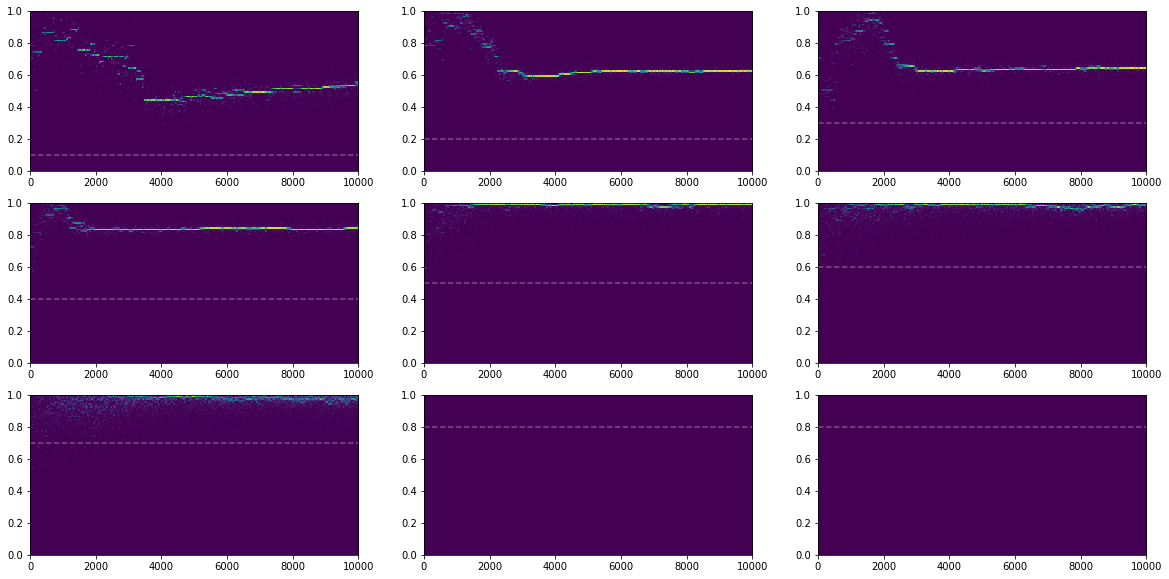

In [31]:
fig, axes = plt.subplots(3,3,figsize=(20,10))
for d,ax in zip(data,axes.flatten()):
    ax.imshow(d.data['individual_traits_density'][('blue', 'interaction_inter')], aspect='auto', extent=(0,gmax,0,1))
    ax.hlines(d.parameters['goal'],0,gmax, color='white', linestyles='--', alpha=0.3)

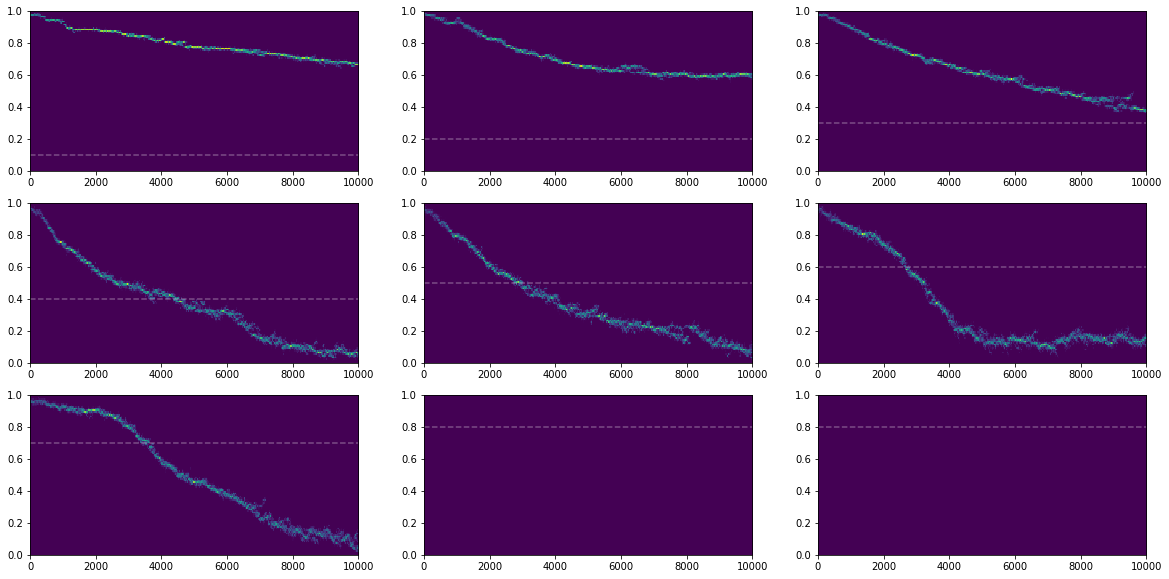

In [34]:
fig, axes = plt.subplots(3,3,figsize=(20,10))
for d,ax in zip(data,axes.flatten()):
    ax.imshow(d.data['individual_traits_density'][('blue', 'growth_rate')], aspect='auto', extent=(0,gmax,0,1))
    ax.hlines(d.parameters['goal'],0,gmax, color='white', linestyles='--', alpha=0.3)

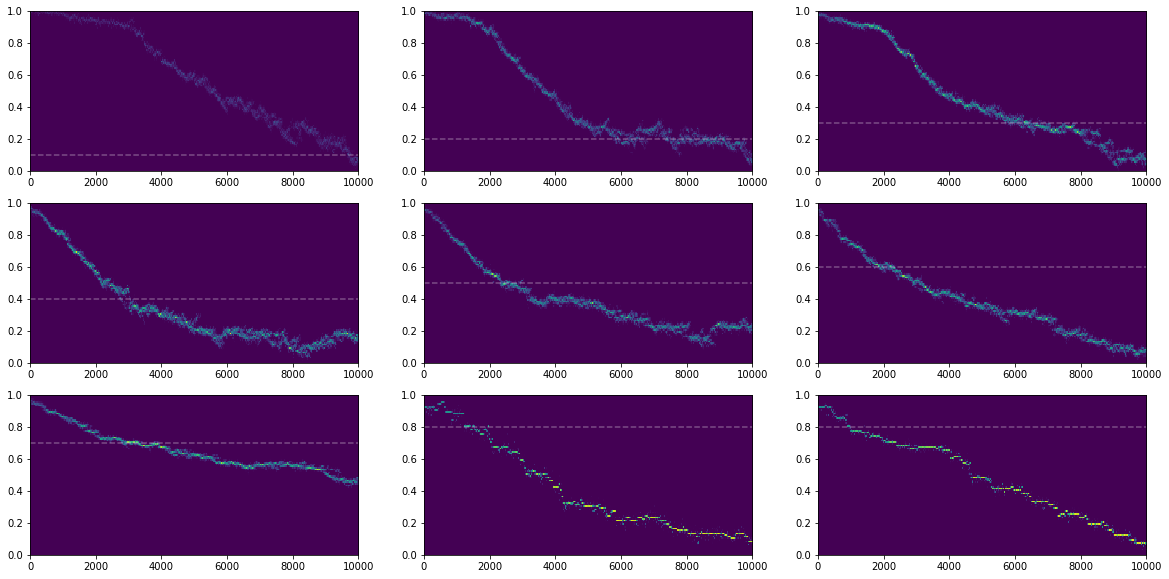

In [32]:
fig, axes = plt.subplots(3,3,figsize=(20,10))
for d,ax in zip(data,axes.flatten()):
    ax.imshow(d.data['individual_traits_density'][('red', 'growth_rate')], aspect='auto', extent=(0,gmax,0,1))
    ax.hlines(d.parameters['goal'],0,gmax, color='white', linestyles='--', alpha=0.3)

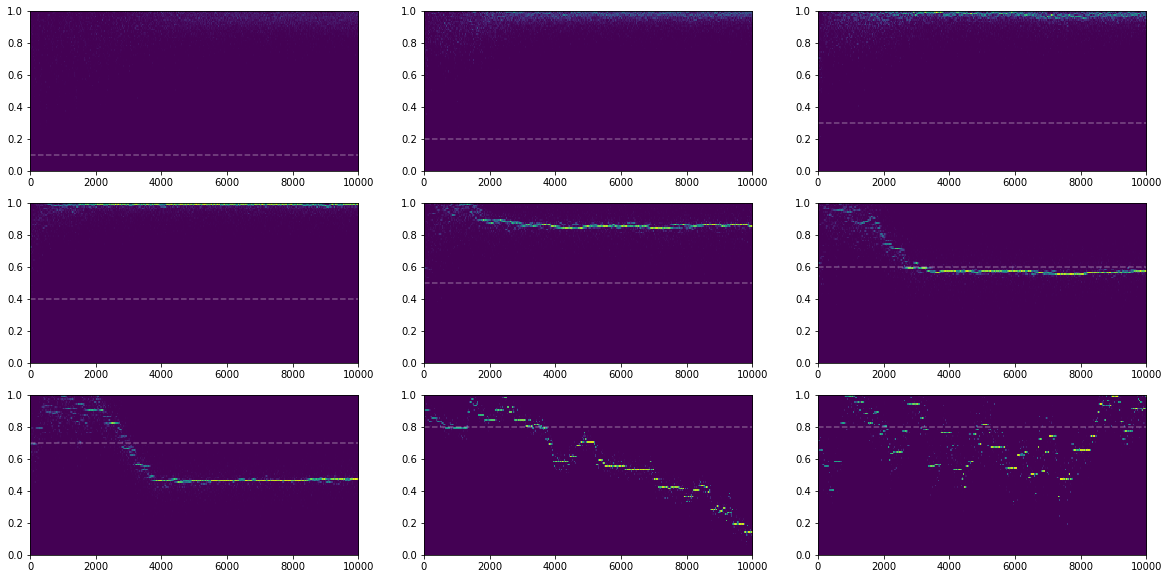

In [30]:
fig, axes = plt.subplots(3,3,figsize=(20,10))
for d,ax in zip(data,axes.flatten()):
    ax.imshow(d.data['individual_traits_density'][('red', 'interaction_inter')], aspect='auto', extent=(0,gmax,0,1))
    ax.hlines(d.parameters['goal'],0,gmax, color='white', linestyles='--', alpha=0.3)

# Figure

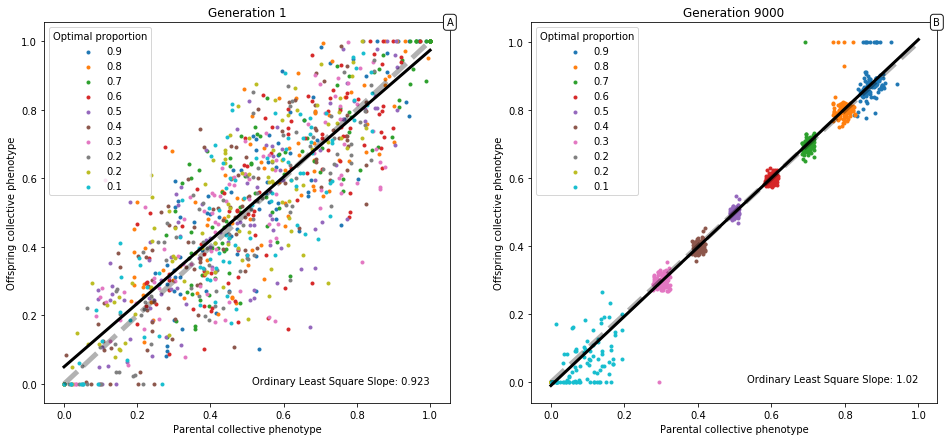

In [35]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
ax[0].annotate('A', **panel_dict)
ax[1].annotate('B', **panel_dict)

for i, gen in enumerate([1, 9000]):
    all_x = []
    all_y = []
    ax[i].set(title='Generation {}'.format(gen),
              xlabel='Parental collective phenotype',
              ylabel='Offspring collective phenotype')
    
    for d in data:
        y = d.data['cp_value'][gen,:]
        x = [d.data['cp_value'][gen-1,i] for i in d.parents[gen-1]]
        all_x.append(x)
        all_y.append(y)
        ax[i].scatter(x,y, label=round(1-d.parameters['goal'],1), marker='.')
    ax[i].legend(title="Optimal proportion", loc='upper left')
    ax[i].plot([0,1],[0,1], ls='--', color='k', lw=5, alpha=0.3)
    
    # Compute the linear regression slope. 
    all_x = np.concatenate(all_x)
    all_y = np.concatenate(all_y)
    lm = linear_model.LinearRegression()
    lm.fit(all_x[:,np.newaxis],all_y)
    x = np.linspace(0,1)
    y = x*lm.coef_ + lm.intercept_
    ax[i].plot(x,y, color='k', lw=3)
    ax[i].text(1, 0, 'Ordinary Least Square Slope: {:1.3}'.format(lm.coef_[0]), horizontalalignment='right', )
    
fig.savefig('heritability.pdf', bbox_inches='tight')
fig.savefig('heritability.png', bbox_inches='tight')